# Bilateral Filtering

In this tutorial we are going to see the Bilateral filtering. Before we are going to start this tutorial lets understand the motivation to read another Image smoothing method irrespective of the fact that we have already studied three types of filtering technique i.e **Averaging Blur**, **Gaussian Blur** and **Median Blur**

These method sometimes blur or smooth out everything irrespective of it being a noise or edges. Because of this there is loss of important information of images. So to overcome this problem bilateral filtering method is proposed.

According to Wikipedia

A bilateral filter is a non-linear, edge-preserving, and noise-reducing smoothing filter for images. It replaces the intensity of each pixel with a weighted average of intensity values from nearby pixels. 

Lets see Some Mathematics behind this filtering method

Before going to see mathematics behind Bilateral filtering lets first see mathematics behind Gaussian Filtering because Gaussian filter is very close to bilateral filter.

## Gaussian Blurring

Gaussian filtering is a weighted average of the intensity of the adjacent positions with a weight decreasing with the spatial distance to the center position .

Mathematically, **Gaussian Blur(GB)** filtered image is given by: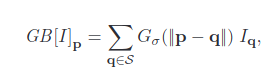

Here **p,q** are the position of pixels and **I** is denoting the image

where **Gσ(x)** denotes the two-dimensional Gaussian kernel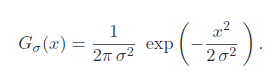

Basically **(Gσ)** is a spatial Gaussian that decreases the influence of distant pixels

The distance is defined by **Gσ(||p−q||)**, where **σ** is a paramter defining the extension of the neighborhood he size of the neighbourhood

## Bilateral Filtering

The main properties of **Bilateral Filtering** is that it does not do averaging across edges. That is why it is also called edge preserving filter

Lets understand Bilateral filtering in depth

As we have seen above,in  Gaussian filter only nearby pixels are considered while filtering. It doesn't consider whether pixels have almost the same intensity. It doesn't consider whether a pixel is an edge pixel or not. So it blurs the edges also, which we don't want to do.

Bilateral filtering also takes a Gaussian filter in space, but one more Gaussian filter which is a function of pixel difference. The Gaussian function of space makes sure that only nearby pixels are considered for blurring, while the Gaussian function of intensity difference makes sure that only those pixels with similar intensities to the central pixel are considered for blurring. So it preserves the edges **since pixels at edges will have large intensity variation**.


The important point which is considered in Bilateral filtering is that the two pixels close to each other not only if they occupy nearby spatial locations but also if they have some similarity in the photometric range. This properties of bilateral filtering overcome the drawback of other filter and able to preserve edges.

Mathematically Bilateral filter is given by following equation **BF**
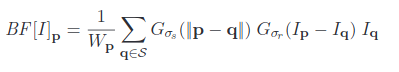 

where **Wp** is a normalization factor
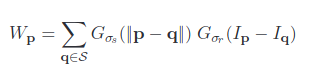 

So as we see here two new term is added in Gaussian filter to become bilateral filter

Fist one is this term
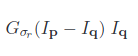



and second one is this

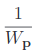

Now we already know that **Gσs** is a spatial Gaussian that decreases the influence of distant pixels and second term is added **Gσr** which is a range Gaussian that decreases the influence of pixels **q** with an intensity value different from **Ip**.

**σs** are the space parameter  and **σr** are the range parameter.

**σs** repersents spatial extent of the kernel size of the considered neighborhood. and σr repersents minimum amplitude of an edge that means that parameters σs and σr will measure the amount of filtering for the image **"I"**.

**Note** :range means quantities related to pixel values i.e intensities while  space refers to pixel location. 


**The main idea behind this mathematics is that**

1.Each pixel is replaced by a weighted average of its neighbors.

2.Each neighbor is weighted by a spatial component that penalizes distant pixels and range component that penalizes pixels with a different intensity. 

3.The combination of both components ensures that only nearby similar pixels contribute to the final result.

**The bilateral filter is controlled by two parameters: σs and σr**

•If range parameter σr increases, the bilateral filter becomes closer to Gaussian blur 

•Increasing the spatial parameter σs smooths larger features

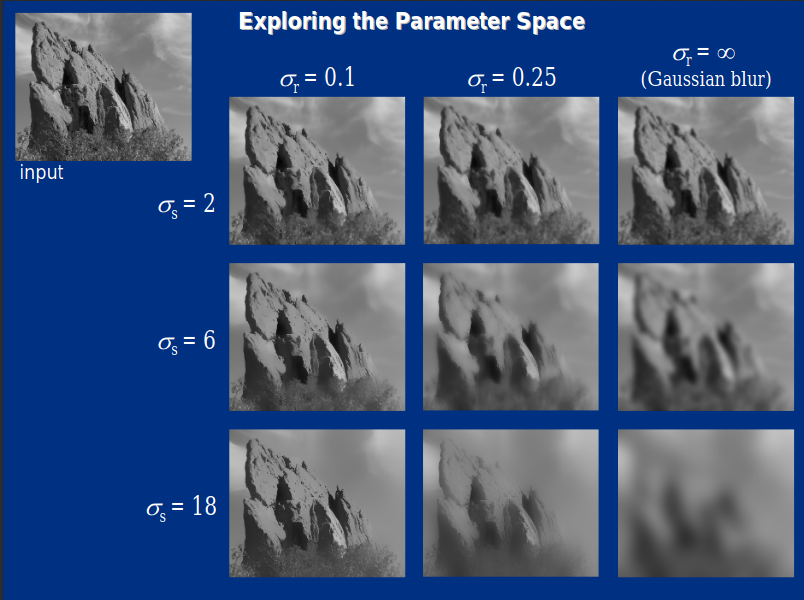

source:https://people.csail.mit.edu/sparis/bf_course/slides/03_definition_bf.pdf

## OpenCV has a function called bilateralFilter() to do bilateral filtering
## <font color="Green"><h4 align="left">Syntax</h4></font>

**cv2.bilateralFilter ( src, dst, d, 	sigmaColor,sigmaSpace, borderType = BORDER_DEFAULT )** 


Parameters

   **src**	 It is the image whose is to be blurred
    
   **dst**	Destination image of the same size and type as src .
    
   **d**	Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed    from sigmaSpace.
   
  **sigmaColor**	Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood  will be mixed together, resulting in larger areas of semi-equal color.
    
   **sigmaSpace**	Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough. When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.
    
   **borderType**	border mode used to extrapolate pixels outside of the image

# Importing opencv library

In [1]:
import cv2

In [2]:
#read image
img=cv2.imread("image_noise.png")

In [4]:
#Display image
window_name='imagefirst'
cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
cv2.imshow(window_name,img)
cv2.waitKey(0)
cv2.destroyAllWindows()


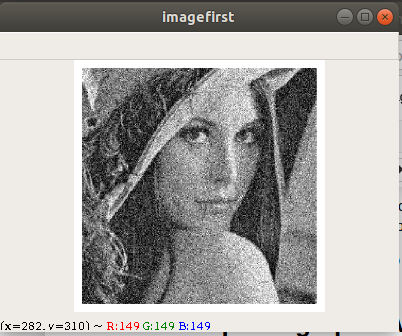

## Example: Bilateral Filtering cv.2bilateralFilter()

In [5]:
bilateral_blur = cv2.bilateralFilter(img,15,80,80)

In [6]:
#Display image
window_name='bilateralfilterimage'
cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
cv2.imshow(window_name,bilateral_blur)
cv2.waitKey(0)
cv2.destroyAllWindows()


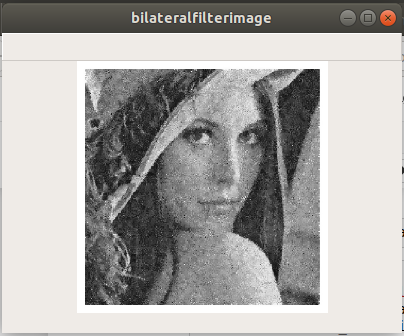

## Blurring using cv2.GaussianBlur()

In [7]:
gaussian_blur = cv2.GaussianBlur(img,(5,5),sigmaX=0)

In [8]:
#Display image
window_name='GaussianBlur'
cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
cv2.imshow(window_name,gaussian_blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

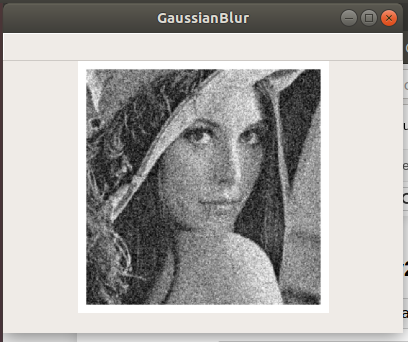

Reaching to the end of this tutorial, we learned how we can do smoothing on an  image using **cv2.bilateralFilter()** ,and how it is different from  **cv2.GaussianBlur()**. With the help of Mathematics, syntax and examples, we got deeper understanding of these functions.